In [158]:
import pandas as pd
import seaborn as sns
import numpy as np

is_refreshed = False

In [3]:
is_refreshed = True

In [4]:
import sys
sys.path.append('../')

In [62]:
import os.path
if not os.path.isfile('../merged_data/sleep_activity_converted.csv'):
    sleep = pd.read_csv("../original_data/sleep_timestamp_eff.csv")
    activity = pd.read_csv("../original_data/activity.csv")
    sleep_activity = pd.merge(sleep, activity, left_on=['egoid', 'dataDate'], right_on=['egoid', 'datadate'] )
    sleep_activity.to_csv('../merged_data/sleep_activity_converted.csv', index=False)
else:
    sleep_activity = pd.read_csv('../merged_data/sleep_activity_converted.csv')
    print('merged data exists')

merged data exists


In [84]:
# from  scripts.displot.displot import display_displot
def display_displot(data: pd.DataFrame):    
    for index, column in enumerate(data.columns):
        if index > 1 and not (column == 'egoid' or column == 'dataDate' or column == 'datadate'):
            sns.displot(data, x=column)

In [7]:
if is_refreshed:
    sleep_activity = pd.read_csv('..\merged_data\sleep_activity_converted.csv')
    sleep_activity.head()

C:\Python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


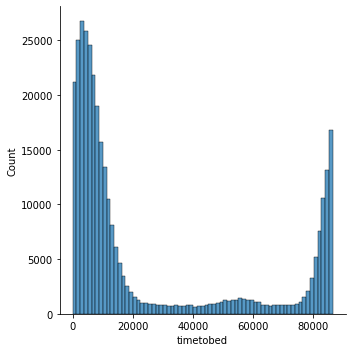

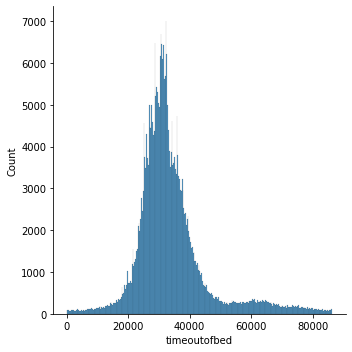

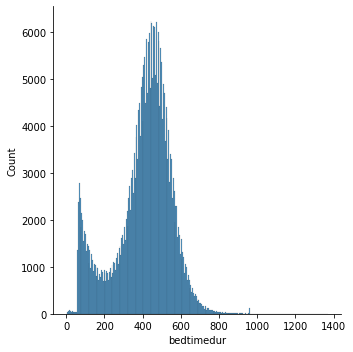

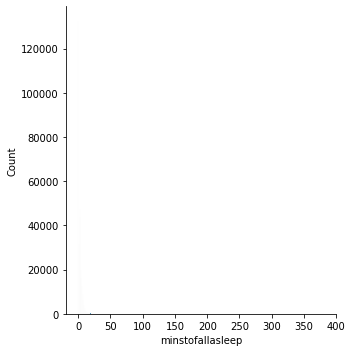

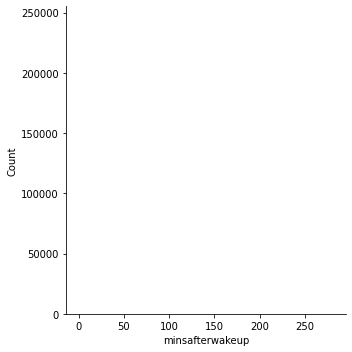

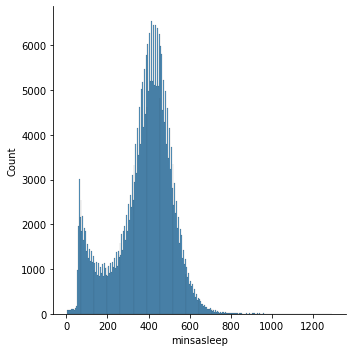

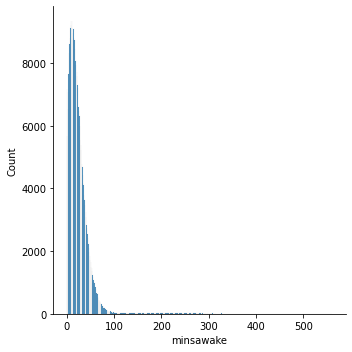

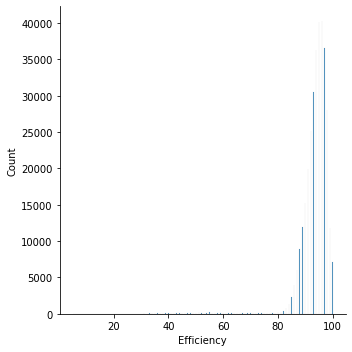

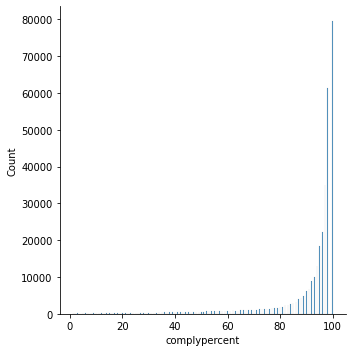

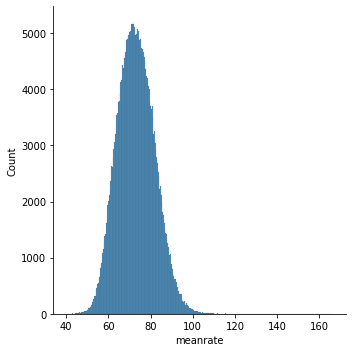

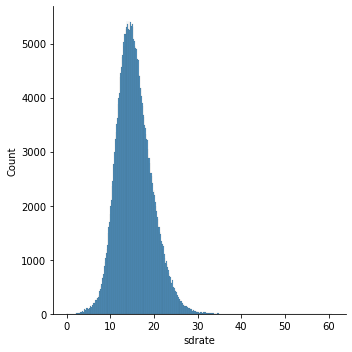

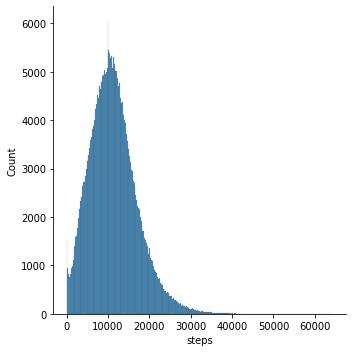

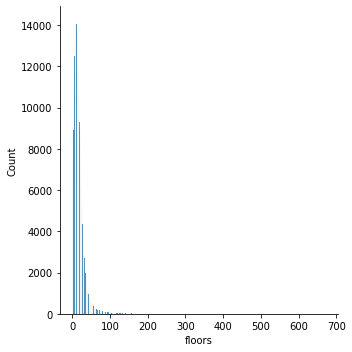

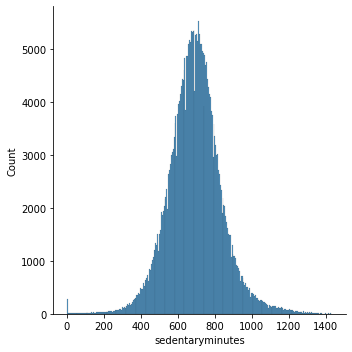

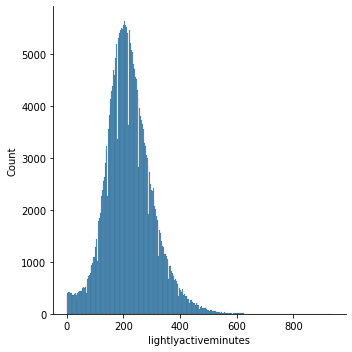

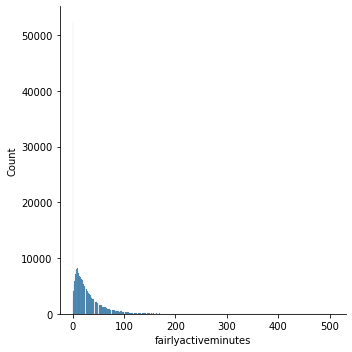

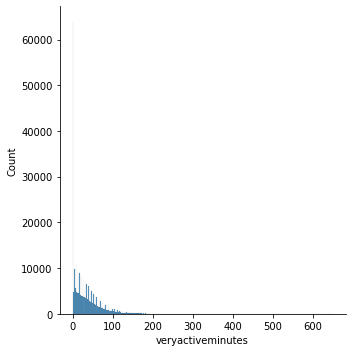

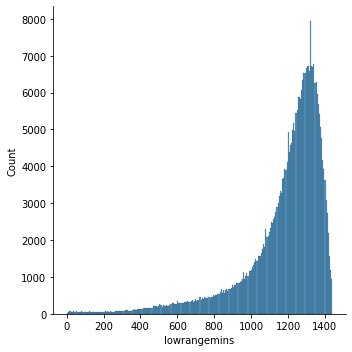

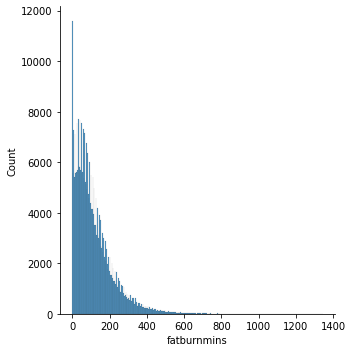

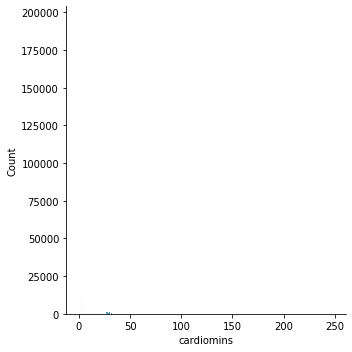

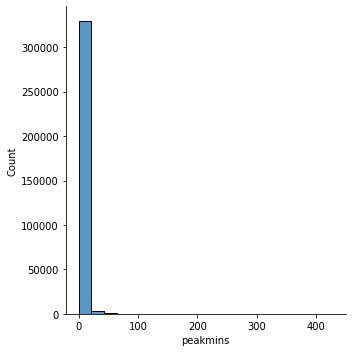

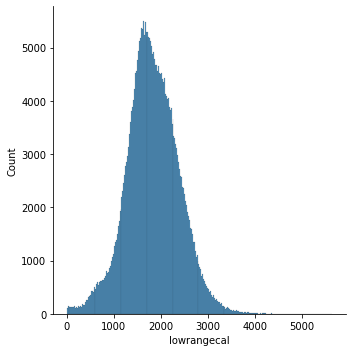

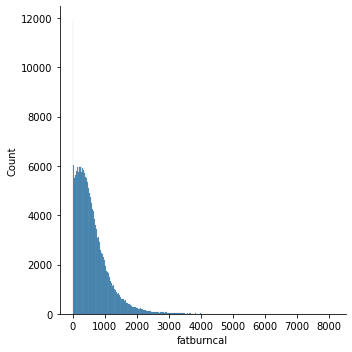

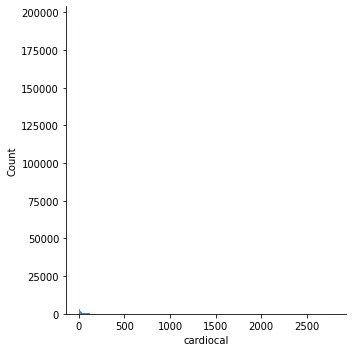

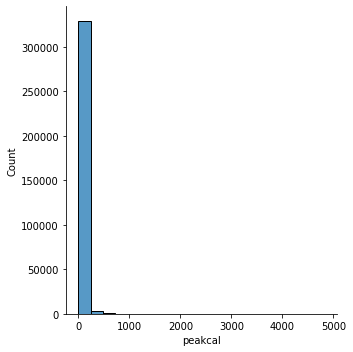

In [8]:
if is_refreshed:
    display_displot(sleep_activity)

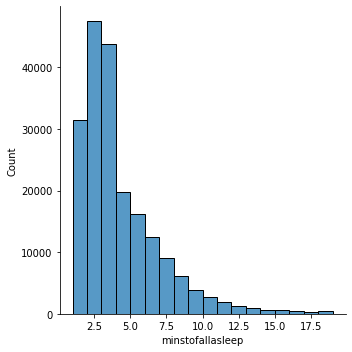

In [9]:
if is_refreshed:
    filtered_minsasleep = sleep_activity['minstofallasleep'
        ][(sleep_activity['minstofallasleep'] > 0) & (sleep_activity['minstofallasleep'] < 20)]

    # print(filtered_minsasleep.value_counts())
    sns.displot(filtered_minsasleep, bins=[i for i in range(1,20)])

In [86]:
from scipy import stats

def test_normality(data: pd.DataFrame):
    alpha = 1e-3
    normal_items = []
    non_normal_items = []
    for index, column in enumerate(data.columns):
        if not (column == 'egoid' or column == 'dataDate' or column == 'datadate'):
            if index < 3 or True:
                k2, p = stats.normaltest(data[column], nan_policy='omit')
                if p < alpha:
                    # print(type())
                    print(column, 'is normal with p', p, 'and k', k2)
                    normal_items.append(column)
                else:
                    print(column, 'is not normal with p', p, 'and k', k2)
                    non_normal_items.append(column)
    print('non_normal_items', non_normal_items)
    data.filter(items=non_normal_items, axis='columns')


In [73]:
sleep_activity = pd.read_csv('../merged_data/sleep_activity_converted.csv')
sleep_activity = sleep_activity.select_dtypes(include=['int64', 'float64'])


In [87]:
test_normality(sleep_activity)

timetobed is normal with p 0.0 and k 53737.92037339573
timeoutofbed is normal with p 0.0 and k 105807.29646956966
bedtimedur is normal with p 0.0 and k 18281.795412929863
minstofallasleep is normal with p 0.0 and k 729641.4135731463
minsafterwakeup is normal with p 0.0 and k 593103.9842298682
minsasleep is normal with p 0.0 and k 17216.398315848535
minsawake is normal with p 0.0 and k 355484.64634394797
Efficiency is normal with p 0.0 and k 343960.4012288169
complypercent is normal with p 0.0 and k 198412.51048399834
meanrate is normal with p 0.0 and k 3698.180356392367
sdrate is normal with p 0.0 and k 19048.387479696245
steps is normal with p 0.0 and k 33607.10453647339
floors is normal with p 0.0 and k 431127.7303871536
sedentaryminutes is normal with p 0.0 and k 15330.865551276564
lightlyactiveminutes is normal with p 0.0 and k 18102.530122085474
fairlyactiveminutes is normal with p 0.0 and k 186280.265527834
veryactiveminutes is normal with p 0.0 and k 147749.47507558882
lowrangem

<AxesSubplot:>

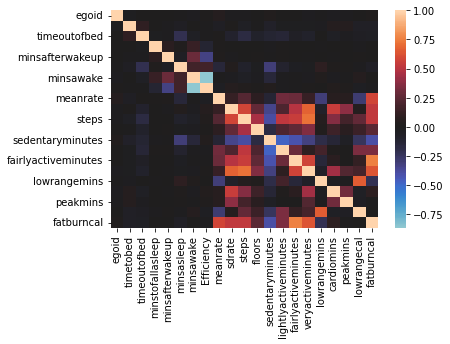

In [141]:
corr_matrix = sleep_activity.corr()
sns.heatmap(corr_matrix, annot=False, center=0)

In [142]:

value_matrix = corr_matrix.values
for i in range(value_matrix.shape[0]):
    for j in range(i+1, value_matrix.shape[0]):
        if value_matrix[i,j] > 0.7:
            print(corr_matrix.columns[i], '\t\t', corr_matrix.columns[j], '\t\t', value_matrix[i,j])


steps 		 veryactiveminutes 		 0.7216066252642814
fairlyactiveminutes 		 fatburncal 		 0.7613626154332875


In [140]:
sleep_activity = sleep_activity.drop(['bedtimedur'], axis='columns')
sleep_activity = sleep_activity.drop(['peakcal', 'cardiocal'], axis='columns')
sleep_activity = sleep_activity.drop(['fatburnmins'], axis='columns')
sleep_activity = sleep_activity.drop(['complypercent'], axis='columns')


In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=sleep_activity.shape[1])

sleep_activity = sleep_activity.dropna()

pca.fit(sleep_activity)

PCA(n_components=21)

In [156]:
pca.explained_variance_ratio_

array([5.36871783e-01, 3.68767482e-01, 7.64381442e-02, 1.76083449e-02,
       1.79489357e-04, 9.94664960e-05, 1.59049687e-05, 1.09647810e-05,
       5.43885251e-06, 1.94512038e-06, 4.27889532e-07, 2.08537031e-07,
       1.59022432e-07, 1.49607904e-07, 3.67825243e-08, 1.82672183e-08,
       1.09113049e-08, 1.00718720e-08, 8.72232672e-09, 3.32132692e-09,
       2.63473893e-09])

In [230]:
normalized_sleep_activity = (sleep_activity-sleep_activity.mean())/sleep_activity.std()

In [231]:
cov_matrix = normalized_sleep_activity.cov()

In [237]:
from numpy.linalg import eig

us_egnvalues, us_egnvectors = eig(cov_matrix)

total_egnvalues = sum(us_egnvalues)

var_exp = [(i/total_egnvalues) for i in sorted(us_egnvalues, reverse=True)]

In [233]:
np.argsort(us_egnvalues)

array([15, 14, 16, 20, 19, 18, 17, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1,  0], dtype=int64)

In [239]:
eig(cov_matrix)[0]

array([4.45053505, 2.17717831, 2.06022628, 1.67592079, 1.28556322,
       1.20511541, 1.02016094, 0.99749456, 0.95807471, 0.91644308,
       0.80739845, 0.78252792, 0.68129875, 0.52880204, 0.07412849,
       0.07256878, 0.13547995, 0.36121151, 0.28380171, 0.27271307,
       0.25335699])

In [234]:
eig_vector_row = np.transpose(us_egnvectors)
eig_vector_row

array([[-4.92198095e-03, -1.75426253e-02, -6.41546963e-02,
         1.99102388e-03, -2.70146942e-03, -1.17430558e-02,
        -9.16124991e-03,  4.89593386e-03,  1.84095392e-01,
         3.65621682e-01,  4.03551343e-01,  2.23650095e-01,
        -2.68069372e-01,  2.39289815e-01,  3.60122605e-01,
         3.87575588e-01, -2.38615189e-02,  2.02929911e-01,
         1.14942248e-01,  9.67036396e-02,  3.76184264e-01],
       [-2.78714410e-02, -2.12508881e-02, -4.78269598e-02,
         1.06476649e-01,  2.45204346e-01,  9.75096097e-02,
         4.52706669e-01, -4.22554488e-01, -2.09349684e-01,
        -7.82711017e-02,  4.81896748e-02,  4.32147107e-02,
        -2.25392396e-01,  1.94306840e-01, -3.19162645e-02,
        -4.30795994e-02,  4.18327823e-01, -9.76278611e-02,
        -7.68312084e-02,  4.30151602e-01, -1.04787286e-01],
       [ 1.49204868e-02,  1.18176883e-02,  3.07303983e-02,
         1.32308405e-01,  2.77257700e-01, -1.14126139e-01,
         4.29376316e-01, -4.70972907e-01,  3.10142456e

In [235]:
cum_var = []
step_var = []
for index, egn_val in enumerate(us_egnvectors[::-1]):
    # print(index, egn_val)
    step_var.append(egn_val/total_egnvalues)
    if index > 0:
        cum_var.append(egn_val/total_egnvalues + cum_var[index - 1])
    else:
        cum_var.append(egn_val/total_egnvalues)
        
print(total_egnvalues)
print(cum_var)

21.000000000000018
[array([ 0.01791354, -0.00498987,  0.00859631, -0.01212772, -0.00401635,
        0.0012275 , -0.00695907, -0.00231522,  0.00126158,  0.00348378,
        0.00175789,  0.00646657, -0.00458429, -0.01141346,  0.00775958,
       -0.02486204, -0.02328862,  0.00463634,  0.00900956, -0.0027846 ,
       -0.00939913]), array([ 0.02251847,  0.01549354, -0.00961926, -0.01696443,  0.00409133,
       -0.00299588, -0.01118955, -0.00457014,  0.00261105,  0.00660586,
        0.00548905,  0.01358923, -0.00888992, -0.01788895,  0.01001602,
       -0.03005502, -0.00979462, -0.00313941,  0.02659944,  0.02133783,
       -0.01730151]), array([ 0.02799191,  0.01183491, -0.0108014 ,  0.00415018,  0.00926348,
        0.00039242,  0.00752489, -0.00553335, -0.01001421,  0.01427148,
        0.00715348,  0.01312771, -0.04121751, -0.01715936,  0.01093081,
       -0.03302777, -0.01560682, -0.00590862,  0.02154601,  0.02796987,
       -0.01777261]), array([ 0.03765524,  0.00718596, -0.01251775,  0.0

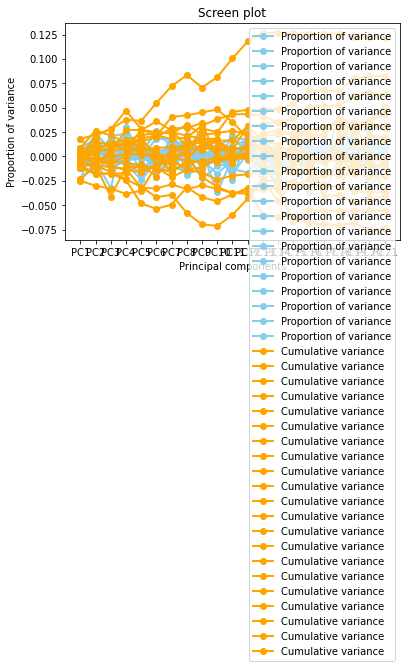

In [236]:
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(cum_var))]

plt.plot(x_labels, step_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Screen plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

for val in 

In [221]:
print(len(cum_var))
print()
for index, val in enumerate(cum_var):
    if val > 0.9:
        print(index, val)
        # break

21

12 0.9056160695165226
13 0.9307971190076185
14 0.9479976673366096
15 0.9615120344654802
16 0.9744983709085816
17 0.9865629896986107
18 0.9930144159444471
19 0.9965443440258847
20 1.0
